### Demonstration of the functions in the DataExploration library, using Kaggle's Titanic dataset

In [1]:
# Import main libraries:
import pandas as pd
import numpy as np
import seaborn as sns

# Importing DataExploration library as DE:
import sys
sys.path.append("../..")  # Wherever the library is stored
import DataExploration.DataExploration as DE

In [2]:
# Import Titanic dataset:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dataInfo:
DE.dataInfo(titanic)

,Type,Observations,Unique Observations,NaN Count,NaN Percent
PassengerId,int64,891,891,0,0.00%
Survived,int64,891,2,0,0.00%
Pclass,int64,891,3,0,0.00%
Name,object,891,891,0,0.00%
Sex,object,891,2,0,0.00%
Age,float64,714,89,177,19.87%
SibSp,int64,891,7,0,0.00%
Parch,int64,891,7,0,0.00%
Ticket,object,891,681,0,0.00%
Fare,float64,891,248,0,0.00%


   10_Largest  Index_Largest  10_Smallest  Index_Smallest
0        80.0            630         0.42             803
1        74.0            851         0.67             755
2        71.0             96         0.75             469
3        71.0            493         0.75             644
4        70.5            116         0.83              78
5        70.0            672         0.83             831
6        70.0            745         0.92             305
7        66.0             33         1.00             164
8        65.0             54         1.00             172
9        65.0            280         1.00             183


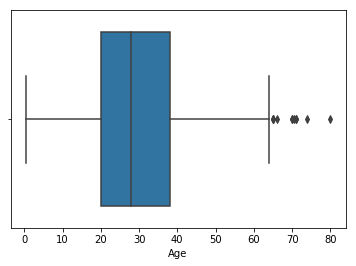

In [4]:
# extremeObs:
DE.extremeObs(titanic, 'Age')

In [5]:
# checkUniqueBy:
DE.checkUniqueBy(titanic, ['PassengerId'])

True

In [6]:
# nonUniqueItems:
DE.nonUniqueItems(titanic, 'Ticket').head()

,Ticket,nonUniqueItems_Count
0,CA. 2343,7
1,347082,7
2,1601,7
3,347088,6
4,CA 2144,6


In [7]:
# freqTab:
DE.freqTab(titanic, 'Pclass')

,Count,Percent,Cumul. Count,Cumul. Percent
3,491,55.11%,491,55.11%
1,216,24.24%,707,79.35%
2,184,20.65%,891,100.00%


In [8]:
# summaryTab:
DE.summaryTab(titanic, 'Pclass', 'Fare')

,Sum,Percent,Cumul. Sum,Cumul. Percent
1,"18,177.412499999984",63.35%,"18,177.412499999984",63.35%
3,"6,714.695100000002",23.40%,"24,892.107599999985",86.75%
2,"3,801.8416999999995",13.25%,"28,693.949299999986",100.00%


In [9]:
# describeBy:
DE.describeBy(titanic, 'Pclass', 'Fare')

,Total Count,Non-NaN Count,Sum,Mean,Std. Dev.,Min,25th Pctl,Median,75th Pctl,Max
1,216,216,18177.4125,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184,184,3801.8417,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491,491,6714.6951,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [10]:
# naPerColumn:
DE.naPerColumn(titanic)

,Count,Percent
PassengerId,0,0.00%
Survived,0,0.00%
Pclass,0,0.00%
Name,0,0.00%
Sex,0,0.00%
Age,177,19.87%
SibSp,0,0.00%
Parch,0,0.00%
Ticket,0,0.00%
Fare,0,0.00%


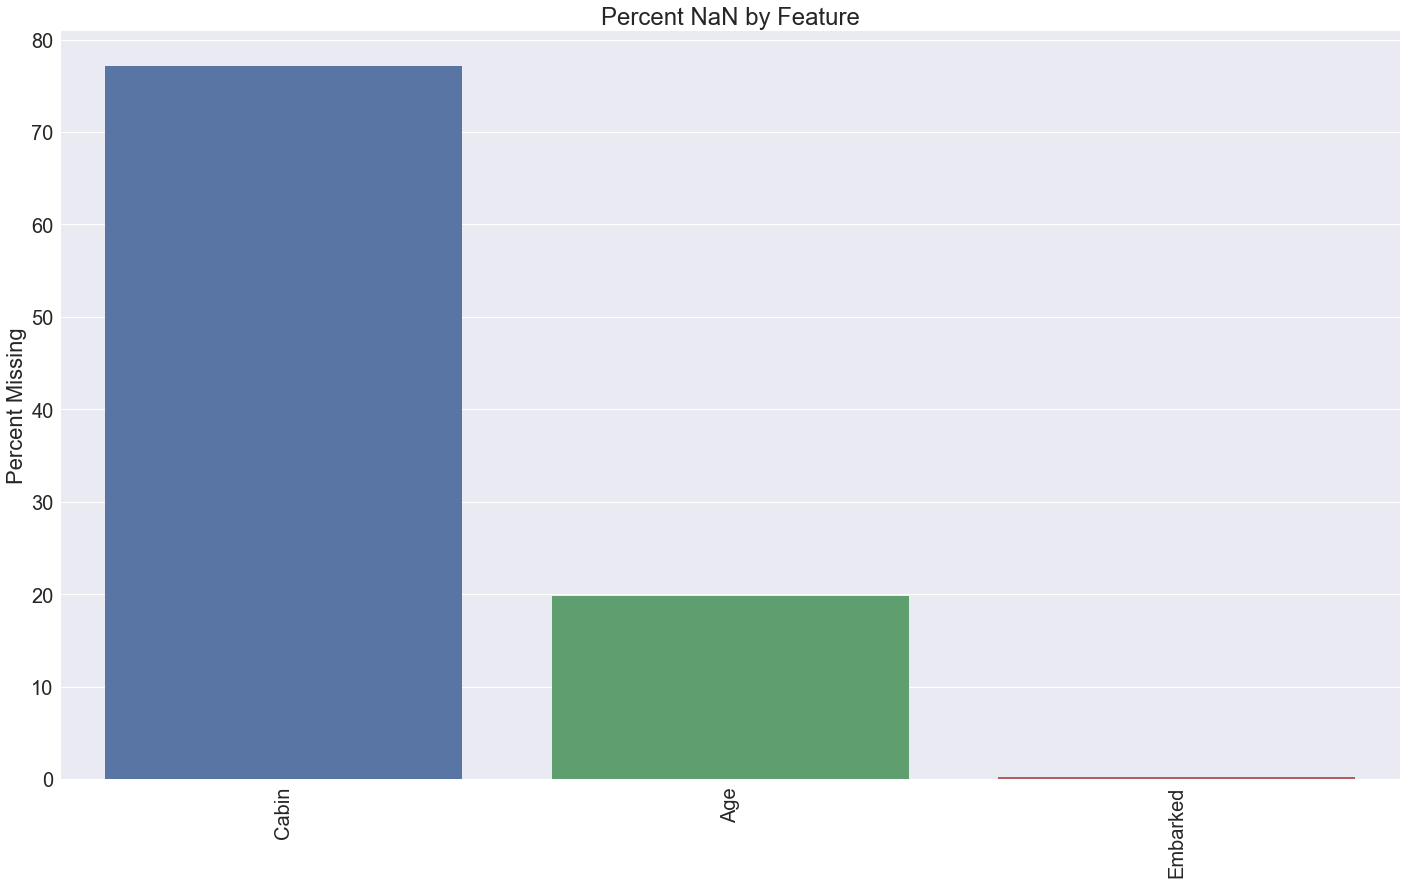

In [11]:
# visualizeNA:
DE.visualizeNA(titanic)

In [12]:
# splitColumn:
titanic2 = DE.splitColumn(titanic, variable = 'Name', delimiter = ',', exp_cols_prefix = 'Name_')

# (In this example it'd be more meaningful to rename the results afterwards):
titanic2.rename(columns = {'Name_0':'Last_Name', 'Name_1':'First_Name'}, inplace = True)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


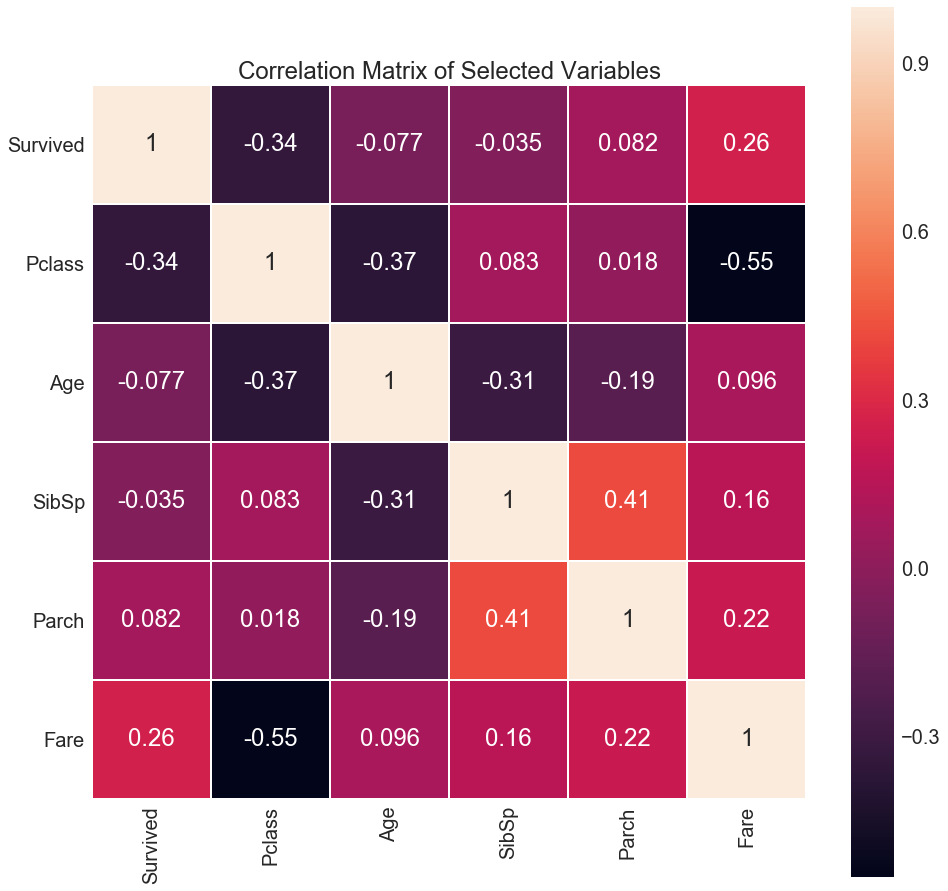

In [13]:
# corrHeatmap:
corr_vars = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
DE.corrHeatmap(titanic, corr_vars)